In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


**Preprocessing**


In [ ]:
dataset = pd.read_csv('Facebook_Marketplace_data.csv')

In [ ]:
std_list = dataset.iloc[:,3:].std()
print(std_list)

num_reactions    462.625309
num_comments     889.636820
num_shares       131.599965
num_likes        449.472357
num_loves         39.972930
num_wows           8.719650
num_hahas          3.957183
num_sads           1.597156
num_angrys         0.726812
Column1                 NaN
Column2                 NaN
Column3                 NaN
Column4                 NaN
dtype: float64


**Substituting Missing Values**

In [ ]:
x = dataset.iloc[:,3:].values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median') #using median due to high standard deviation
imputer.fit(x)
x = imputer.transform(x)
print(x)

[[529. 512. 262. ...   1.   1.   0.]
 [150.   0.   0. ...   0.   0.   0.]
 [227. 236.  57. ...   1.   0.   0.]
 ...
 [  2.   0.   0. ...   0.   0.   0.]
 [351.  12.  22. ...   0.   0.   0.]
 [ 17.   0.   0. ...   0.   0.   0.]]


**Q1: Correlate Time of Publishing and Number of Reactions**

In [ ]:
dataset['status_published'] = pd.to_datetime(dataset['status_published'])
dataset['status_published'] = dataset['status_published'].dt.hour #I extracted the only the hour as the date + minute is inconsequential
print(dataset['status_published'])

0        6
1       22
2        6
3        2
4        3
        ..
7045     2
7046    11
7047    23
7048     0
7049    10
Name: status_published, Length: 7050, dtype: int32


In [ ]:
a = dataset.iloc[:,2:4]
correlation_matrix = a.corr()

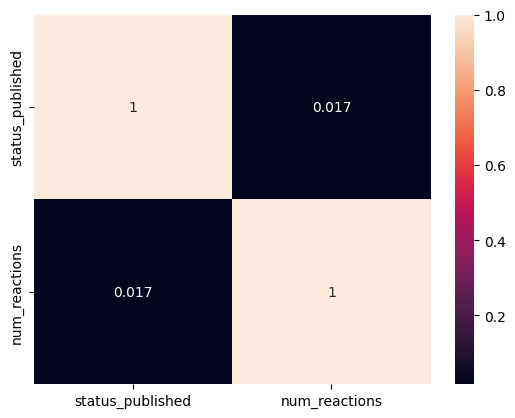

In [ ]:
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
hourly_reactions = dataset.groupby('status_published')['num_reactions'].mean().sort_values(ascending=False)
print(hourly_reactions)

status_published
19    442.368421
20    417.288136
17    384.000000
18    351.750000
15    341.666667
6     340.213198
5     293.870968
3     290.270208
16    283.250000
21    261.907895
0     261.839474
14    261.333333
23    244.276850
4     242.685864
22    238.376126
10    234.508333
9     205.780761
8     204.796897
1     203.315725
12    196.053763
7     183.301549
11    180.639456
13    176.875000
2     163.907618
Name: num_reactions, dtype: float64


**Q2: Correlation between Reactions and Comments/Shares**

In [ ]:
reactions = dataset.iloc[:,3].values
comments = dataset.iloc[:,4].values
shares = dataset.iloc[:,5].values

**Build regressor for relation**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
reactions_reshaped = reactions.reshape(-1,1)
comments_reshaped = comments.reshape(-1,1)
shares_reshaped = shares.reshape(-1,1)
regressor.fit(reactions_reshaped, comments_reshaped)


LinearRegression()

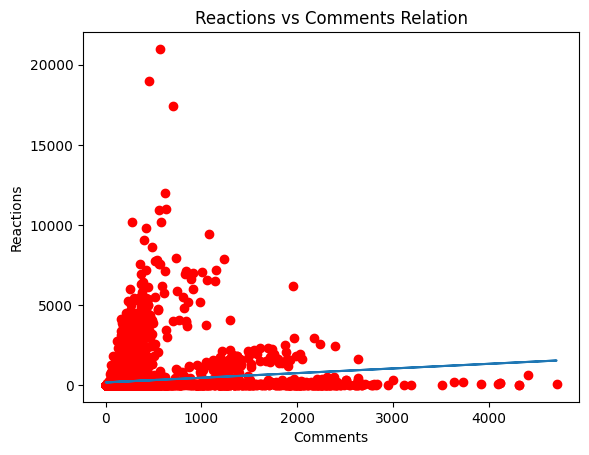

In [ ]:
plt.scatter(reactions,comments, color = 'red')
plt.plot(reactions,regressor.predict(reactions_reshaped))
plt.xlabel('Comments')
plt.ylabel('Reactions')
plt.title('Reactions vs Comments Relation')
plt.show()

In [ ]:
regressor1 = LinearRegression()
regressor1.fit(reactions_reshaped, shares_reshaped)

LinearRegression()

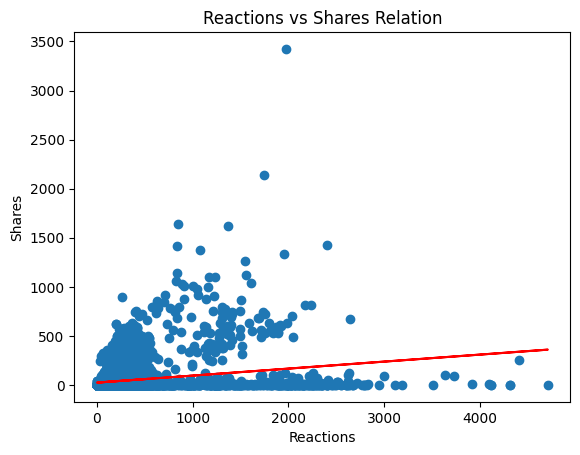

In [ ]:
plt.scatter(reactions,shares)
plt.plot(reactions, regressor1.predict(reactions_reshaped), color = 'red')
plt.xlabel('Reactions')
plt.ylabel('Shares')
plt.title('Reactions vs Shares Relation')
plt.show()


In [ ]:
z = dataset.iloc[:,3:]
correlation_matrix = z.corr()

**Correlation Matrix**

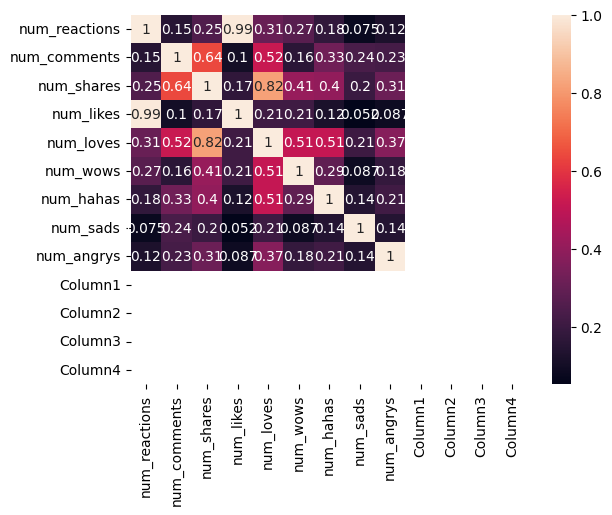

In [ ]:
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True)
plt.show()

**Q3: K-Means Clustering**

In [ ]:
newdataset = dataset.drop(['status_published', 'Column1', 'Column2', 'Column3', 'Column4','status_id'], axis=1)
x = newdataset.iloc[:,:].values


One Hot Encoding for Categorical Data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[0] )], remainder = 'passthrough')
x = np.array(ct.fit_transform(x))





**Q4: Finding Optimum Number of Clusters by Elbow Method**

In [ ]:

from sklearn.cluster import KMeans

In [ ]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

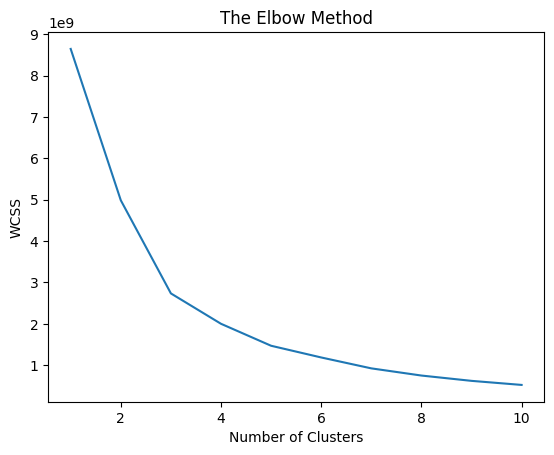

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**Number of clusters to be used is 3**

In [ ]:
kmeans = KMeans(n_clusters = 3, init='k-means++',random_state = 42 )
y_kmeans = kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Using Silhouette Score to Calculate Accuracy**

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(x, y_kmeans)
print("The average silhouette score is :", silhouette_avg) #score is 0.81 indicating good clustering (4 clusters produced an identical silhouette score as well)

The average silhouette score is : 0.8164574017116384


**Q5: Different type of posts count**

In [ ]:
post_type_counts = dataset['status_type'].value_counts()
print(post_type_counts)

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


**Q6: Averages of Reactions, Comments, Shares**

In [ ]:
average_metrics = dataset.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()
print(average_metrics)

             num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949
